### Data representation:

so I'am using the CSV files (the Fingerprint.CSV), to generate some sample images, that are distinct and represents different ligands along with their interactions based on their Time frame. e.g., if time frame is 0, and ligand A with interaction A has the value of 1, it will be included in the image along with all the other ligands and their interactions during frame 1. 

**Note:** each of the selected ligand and interaction will have a unique color code for better representation.

In [5]:
#getting the Dependencies 
%pip install pandas matplotlib numpy seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
                                                                                    # cleaning our data
import pandas as pd

# Load raw dataset
input_path = "Data/Original/fp_comp_dataframe_MDMA.csv"  
df_raw = pd.read_csv(input_path)

# Extract ligand and interaction rows
ligand_labels = df_raw.iloc[0, 1:]
interaction_labels = df_raw.iloc[1, 1:]

# Create combined column names: "Ligand.Interaction"
combined_labels = [f"{lig}.{inter}" for lig, inter in zip(ligand_labels, interaction_labels)]

# Extract the actual data (starting from row 3)
df_clean = df_raw.iloc[3:].reset_index(drop=True)

# Rename columns
df_clean.columns = ["Frame"] + combined_labels

# Convert Frame column to integer
df_clean["Frame"] = df_clean["Frame"].astype(int)

# Replace NaNs with 0s and convert interaction data to integers
df_clean.iloc[:, 1:] = df_clean.iloc[:, 1:].fillna(0).astype(int)

#use this one for MDMA
#df_clean.iloc[:, 1:] = df_clean.iloc[:, 1:].fillna(0).astype(float).astype(int)

# Preview cleaned DataFrame
df_clean.head()



C:\Users\Amir\AppData\Local\Temp\ipykernel_21244\1931557927.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean.iloc[:, 1:] = df_clean.iloc[:, 1:].fillna(0).astype(float).astype(int)


,Frame,ALA423.P.Hydrophobic,ALA423.P.VdWContact,ALA77.P.VdWContact,ALA81.P.Hydrophobic,ASP421.P.Cationic,ASP421.P.Hydrophobic,ASP421.P.VdWContact,ASP79.P.Cationic,ASP79.P.HBDonor,...,SER422.P.VdWContact,TYR156.P.HBAcceptor,TYR156.P.Hydrophobic,TYR156.P.PiStacking,TYR156.P.VdWContact,VAL152.P.Hydrophobic,VAL152.P.VdWContact,VAL328.P.Hydrophobic,VAL328.P.VdWContact,VAL430.P.Hydrophobic
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,1,0,1,0,1,1,0,0,1,0
2,2,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,1,1,0,0,0
3,3,0,0,0,0,0,0,0,1,1,...,1,0,1,0,1,1,1,0,0,0
4,4,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,1,0,0,0,0


In [65]:
                                                                                #saving the clean data
# Set output path and filename
output_path = "Data/Tuned/MDMA.csv"  

# Save cleaned DataFrame to CSV
df_clean.to_csv(output_path, index=False)

print(f"saved to: {output_path}")


saved to: Data/Tuned/MDMA.csv


### getting the Type of interactions

this will be used as our features, when creating images 

In [2]:
import pandas as pd

# Load the dataset
df_raw = pd.read_csv("Data/Original/fp_comp_dataframe_MDMA.csv")

# Extract the interaction labels from the second row (index 1), skipping the first column
interaction_labels = df_raw.iloc[1, 1:]

# Drop NaN values and get unique interaction types
unique_interactions = interaction_labels.dropna().unique()

# Sort the interactions for readability
sorted_interactions = sorted(unique_interactions)

# Display the result
print(sorted_interactions)


['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']


### Results: 

* AMP: ['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']

* COC: ['CationPi', 'Cationic', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']

* MAPB: ['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']

* MDMA: ['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']



## Color Coded images:

In this step I will attempt to generate one image per time frame using the **Frame** column and all the other columns that represents the Ligand and their interactions.

In [29]:
df = pd.read_csv('Data/Tuned/AMP.csv')
output_dir = 'Data/Images/AMP-img'

In [32]:
                                                                          #Assigning color codes and image generation 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import colorsys

# Define the known interaction types
known_interactions = ["Hydrophobic", "VdWContact", "HBDonor", "CationPi", "PiStacking"]

# Generate distinct colours for known interaction types
def generate_distinct_colors(n):
    hues = [i / n for i in range(n)]
    return [colorsys.hsv_to_rgb(h, 0.7, 0.9) for h in hues]

palette = generate_distinct_colors(len(known_interactions))
interaction_color_map = dict(zip(known_interactions, palette))

# Randomly select 20 sample frames
sampled_frames = df['Frame'].sample(20, random_state=42).unique()

# Generate image for each sampled frame
for frame in sampled_frames:
    row = df[df['Frame'] == frame].iloc[0]

    labels = []
    colors = []
    alphas = []

    for col in df.columns:
        if col == 'Frame':
            continue
        labels.append(col)
        interaction_type = col.split('.')[-1]
        color = interaction_color_map.get(interaction_type, (0.5, 0.5, 0.5))  # fallback grey
        colors.append(color)
        alphas.append(1.0 if row[col] == 1 else 0.2)

    fig, ax = plt.subplots(figsize=(12, max(3, len(labels) * 0.3)))

    # Add bars
    for i, (label, color, alpha) in enumerate(zip(labels, colors, alphas)):
        ax.barh(i, 1, color=color, alpha=alpha)

    # Set y-axis labels and other formatting
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_xticks([])
    ax.set_title(f'Frame {frame} Interactions (All)', pad=40)

    # Create and place legend above the plot
    patches = [mpatches.Patch(color=interaction_color_map[it], label=it) for it in known_interactions]
    ax.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 1.05),
              ncol=len(patches), frameon=False)

    plt.tight_layout()
    plt.savefig(f'{output_dir}/frame_{frame}.png')
    plt.close()


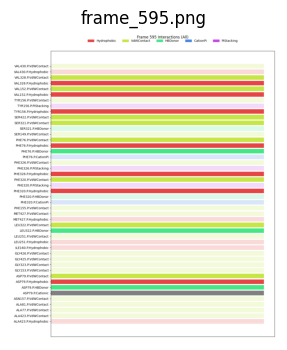

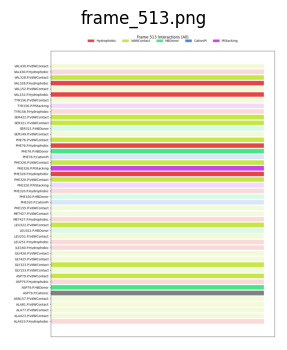

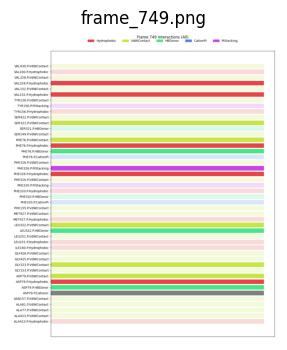

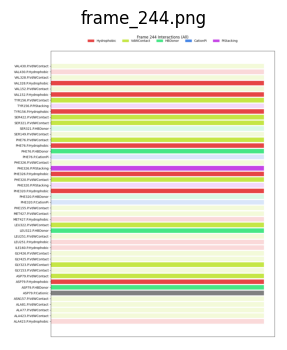

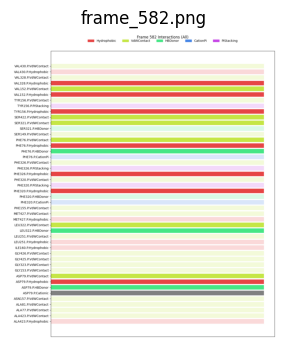

In [33]:
#Visualization
import os
import random
from matplotlib.pyplot import imread, imshow, subplots, figure

# Path to the folder containing generated images
image_folder = 'Data\Images\AMP-img'

# Get all image file names
all_images = [img for img in os.listdir(image_folder) if img.endswith('.png')]

# Randomly select 5 images
selected_images = random.sample(all_images, 5)

# Plot each image in its own row
for img_name in selected_images:
    img = imread(os.path.join(image_folder, img_name))
    fig = figure(figsize=(10, 4))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis('off')



## Multi-channel image (MCI)

so the current representation is **correct** but since I'm planning to use a CNN, i would say using a Multi-channel image would be much more suitable; why?

* we can create a 3D array where each axes represents:
    * ligand-interactions
    * time (frames)
    * channels, each channel encodes a specific interaction type

in this way we are replicating the RGB channels in images, thus, CNNs can learn across types while maintaining spatial consistency.


In [82]:
import pandas as pd
import numpy as np
import os

csv_path = 'Data/Tuned/MDMA.csv'
output_dir = 'Data/Images/MDMA-mci/npy'
dataset_label = 'MDMA'                                             #DS label for model training


df = pd.read_csv(csv_path)

known_interactions = ['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']
sampled_frames = df['Frame'].sample(200, random_state=42).unique()
interaction_columns = [col for col in df.columns if col != 'Frame']

# Map interaction type to column indexes
interaction_type_indices = {itype: [] for itype in known_interactions}
for idx, col in enumerate(interaction_columns):
    itype = col.split('.')[-1]
    if itype in known_interactions:
        interaction_type_indices[itype].append(idx)

records = []  # For labels.csv

# --- Inside your loop for each sampled frame ---
for frame in sampled_frames:
    row = df[df['Frame'] == frame].iloc[0].drop('Frame').values
    img = np.zeros((len(known_interactions), len(interaction_columns)), dtype=np.uint8)

    for ch, itype in enumerate(known_interactions):
        for idx in interaction_type_indices[itype]:
            img[ch, idx] = int(row[idx])

    # Use frame number in filename
    filename = f"{dataset_label}_frame_{frame}.npy"
    np.save(os.path.join(output_dir, filename), img)

    # Save label and frame info
    records.append({
        'filename': filename,
        'label': dataset_label,
        'frame': frame
    })

# Save as CSV
pd.DataFrame(records).to_csv(os.path.join(output_dir, 'labels.csv'), index=False)

## trying to include the residues in the CSV as well 

In [11]:
import pandas as pd
import numpy as np
import os

# Setup
csv_path = 'Data\Tuned\AMP.csv'
output_dir = 'Data/New/AMP/npy'
dataset_label = 'AMP'

df = pd.read_csv(csv_path)

# Interaction types of interest
known_interactions = ['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']
sampled_frames = df['Frame'].sample(10, random_state=42).unique()
interaction_columns = [col for col in df.columns if col != 'Frame']

# Full residue list per column
residue_full_labels = [col.split('.')[0] for col in interaction_columns]

# Group column indices by interaction type
interaction_type_indices = {itype: [] for itype in known_interactions}
for idx, col in enumerate(interaction_columns):
    itype = col.split('.')[-1]
    if itype in known_interactions:
        interaction_type_indices[itype].append(idx)

records = []

# Loop through sampled frames
for frame in sampled_frames:
    row = df[df['Frame'] == frame].iloc[0].drop('Frame').values

    # Get active column indices (where value is 1)
    active_indices = [i for i, val in enumerate(row) if val == 1]
    active_residues = sorted(set([residue_full_labels[i] for i in active_indices]))

    # Build reduced image: only active columns
    img = np.zeros((len(known_interactions), len(active_indices)), dtype=np.uint8)

    for new_col, original_idx in enumerate(active_indices):
        itype = interaction_columns[original_idx].split('.')[-1]
        if itype in known_interactions:
            ch = known_interactions.index(itype)
            img[ch, new_col] = 1

    # Build reduced residue label list
    reduced_residues = [residue_full_labels[i] for i in active_indices]

    # Prepare and save full .npy object
    output_obj = {
        "binary_array": img,
        "residue_labels": reduced_residues,
        "interaction_labels": known_interactions
    }

    filename = f"{dataset_label}_frame_{frame}.npy"
    np.save(os.path.join(output_dir, filename), output_obj)

    # Save metadata to CSV
    records.append({
        'filename': filename,
        'label': dataset_label,
        'frame': frame,
        'residues': '|'.join(reduced_residues)
    })

# Save to CSV
pd.DataFrame(records).to_csv(os.path.join(output_dir, 'labels.csv'), index=False)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths
input_dir = 'Data/New/AMP/npy'              #input 
output_dir = 'Data/New/AMP/png'             #output
os.makedirs(output_dir, exist_ok=True)

# Define interaction type labels
known_interactions = ['CationPi', 'Cationic', 'HBAcceptor', 'HBDonor', 'Hydrophobic', 'PiStacking', 'VdWContact']

# Loop through .npy files
for filename in os.listdir(input_dir):
    if filename.endswith('.npy'):
        file_path = os.path.join(input_dir, filename)
        data = np.load(file_path, allow_pickle=True).item()  # Load dict

        binary_array = data["binary_array"]

        # Create subplot: one row per channel
        fig, axes = plt.subplots(binary_array.shape[0], 1, figsize=(12, binary_array.shape[0]*1.5))
        fig.suptitle(filename, fontsize=14)

        for i, ax in enumerate(axes):
            ax.imshow(binary_array[i:i+1], aspect='auto', cmap='viridis')
            ax.set_title(known_interactions[i], fontsize=10)
            ax.axis('off')

        plt.tight_layout()
        output_path = os.path.join(output_dir, filename.replace('.npy', '.png'))
        plt.savefig(output_path, dpi=150)
        plt.close()
